## Initial stesp

Reading the given train parquet files and concat them

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
current_directory

'd:\\Teaching_Materials\\Suresh_sir'

In [5]:
import os
import pandas as pd
overall_data = pd.DataFrame()
i = 0
path = os.path.join(os.getcwd(), 'training_data')
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(path, filename))
        temp_file = os.path.join(path, filename)
        temp_df = pd.read_parquet(temp_file)
        overall_data = pd.concat([overall_data, temp_df], axis=0)

        i += 1
        if i == 3:
            break

d:\Teaching_Materials\Suresh_sir\training_data\train_data_0.pq


In [6]:
overall_data.shape

(1974724, 61)

In [7]:
overall_data

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,...,3,3,3,4,1,2,3,1,0,1
1974720,249998,5,7,9,4,8,1,11,19,1,...,3,3,3,4,1,2,4,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,...,3,3,3,4,1,2,3,1,0,1
1974722,249999,2,9,16,10,13,10,4,12,2,...,3,3,3,4,1,2,3,1,0,0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

ModuleNotFoundError: No module named 'missingno'

In [10]:
overall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

Dropping the columns

In [11]:
overall_data.drop(columns=['enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5',
       'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10',
       'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14',
       'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18',
       'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22',
       'enc_paym_23', 'enc_paym_24','is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90'], inplace=True)

In [12]:
missing_values = overall_data.isnull().sum()
missing_values

id                               0
rn                               0
pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_outstanding            0
pre_loans_total_overdue          0
pre_loans_max_overdue_sum        0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit               0
is_zero_maxover2limit            0
enc_paym_0                       0
enc_loans_account_holder_type    0
enc_loans_credit_status          0
enc_loans_credit_typ

Reading the target / label information

In [13]:
data_2 = pd.read_csv('./target.csv')
data_2.head()

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [9]:
data_2.shape

(3000000, 2)

In [10]:
data_2["flag"].value_counts()

flag
0    2893558
1     106442
Name: count, dtype: int64

Merge the train data and and respective label (flag) using 'id'

In [11]:
final_data = pd.merge(overall_data, data_2 , on = 'id')

In [12]:
final_data.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0',
       'enc_loans_account_holder_type', 'enc_loans_credit_status',
       'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag',
       'fclose_flag', 'flag'],
      dtype='object')

Understanding the data distribution

In [13]:
final_data["flag"].value_counts()

flag
0    6184365
1     194036
Name: count, dtype: int64

In [14]:
final_data.shape

(6378401, 33)

## Train_Test split

Splitting into training and testing using randon 30% of data based on stratifying based on label

In [15]:
X = final_data.drop(columns='flag')
y = final_data['flag']
print(final_data.columns)
# split data into train subset and test subset
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0',
       'enc_loans_account_holder_type', 'enc_loans_credit_status',
       'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag',
       'fclose_flag', 'flag'],
      dtype='object')


## Modeling

Base model - Logistic Regression (without handling class imbalance)

In [16]:
LRclassifier = LogisticRegression(solver='saga', max_iter=400, random_state=1)
LRclassifier.fit(X_tr, y_tr)

y_pred = LRclassifier.predict(X_tst)

print(classification_report(y_tst, y_pred, zero_division=1))
print(confusion_matrix(y_tst, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_tst)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      1.00      0.98   1855310
           1       1.00      0.00      0.00     58211

    accuracy                           0.97   1913521
   macro avg       0.98      0.50      0.49   1913521
weighted avg       0.97      0.97      0.95   1913521

[[1855310       0]
 [  58211       0]]
LR accuracy: 96.96%


## Handling class imbalance using undersampling approach

In [17]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)

In [18]:
X_over["flag"] = y_over

In [19]:
X_over.shape, y_over.shape

((388072, 33), (388072,))

In [20]:
X_over.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0',
       'enc_loans_account_holder_type', 'enc_loans_credit_status',
       'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag',
       'fclose_flag', 'flag'],
      dtype='object')

Train_test split after undersampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

Logistic Regression on undersampled data

In [22]:
LRclassifier = LogisticRegression(solver='saga', max_iter=400, random_state=1)
LRclassifier.fit(X_over, y_over)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.53      0.03      0.05     58538
           1       0.50      0.98      0.66     57884

    accuracy                           0.50    116422
   macro avg       0.52      0.50      0.35    116422
weighted avg       0.52      0.50      0.35    116422

[[ 1474 57064]
 [ 1288 56596]]
LR accuracy: 49.88%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


XGBoost classifier

In [38]:
X_train

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,74470,4,15,0,11,16,6,3,0,2,...,1,1,1,0,1,3,4,1,0,0
1,198476,11,17,10,17,14,12,11,13,2,...,0,1,1,0,1,2,3,1,0,0
2,242798,2,17,13,16,10,11,6,17,2,...,1,1,1,0,1,3,1,1,0,0
4,2581225,4,0,14,7,6,13,3,3,2,...,1,1,1,1,1,3,4,1,0,0
5,390868,6,11,9,14,7,14,8,8,6,...,0,1,1,0,1,2,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388067,2749995,3,14,6,3,5,9,13,5,1,...,1,1,0,0,1,3,4,1,0,0
388068,2749995,4,10,4,7,3,6,13,19,2,...,1,1,1,0,1,3,4,1,0,0
388069,2749995,5,10,6,12,7,13,14,9,0,...,1,1,0,0,1,3,4,1,0,0
388070,2749995,6,3,12,12,5,2,12,14,2,...,0,0,0,1,1,3,3,1,0,0


In [41]:
X_test = X_test.drop('flag', axis=1)

In [44]:
from sklearn.metrics import accuracy_score
model = XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6314699970795897

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     58538
           1       0.64      0.58      0.61     57884

    accuracy                           0.63    116422
   macro avg       0.63      0.63      0.63    116422
weighted avg       0.63      0.63      0.63    116422



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     58538
           1       0.92      0.91      0.92     57884

    accuracy                           0.92    116422
   macro avg       0.92      0.92      0.92    116422
weighted avg       0.92      0.92      0.92    116422

Confusion Matrix:
[[54194  4344]
 [ 5229 52655]]
Accuracy: 0.9177732730927144


In [ ]:
from sklearn.model_selection import StratifiedKFold, GroupKFold
import numpy as np
model = XGBClassifier()

# Define the number of splits for StratifiedGroupKFold
n_splits = 5  # You can change this as per your requirement

# Define your groups. For example, if your data has subject IDs, you can use those as groups.
groups = final_data['id']  # Replace 'subject_id' with the column name of your groups

# Initialize the GroupKFold object to split by groups
group_kfold = GroupKFold(n_splits=n_splits)

# Initialize an empty list to store train and test indices for each split
train_test_splits = []
X = final_data.iloc[:,:61]
y = final_data['flag']
# Loop through the splits generated by GroupKFold
for train_index, test_index in group_kfold.split(X, y, groups=groups):
    X_train_group, X_test_group = X.iloc[train_index], X.iloc[test_index]
    y_train_group, y_test_group = y.iloc[train_index], y.iloc[test_index]

    # Initialize StratifiedKFold object to split within each group
    strat_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Loop through the splits generated by StratifiedKFold within each group
    for strat_train_index, strat_test_index in strat_kfold.split(X_train_group, y_train_group):
        X_train_strat, X_test_strat = X_train_group.iloc[strat_train_index], X_train_group.iloc[strat_test_index]
        y_train_strat, y_test_strat = y_train_group.iloc[strat_train_index], y_train_group.iloc[strat_test_index]

        # Append train and test indices for this split to the list
        train_test_splits.append((strat_train_index, strat_test_index))

# Now you have the train and test indices for each split, you can use them to get the actual data subsets
for split, (train_idx, test_idx) in enumerate(train_test_splits):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Your model training and evaluation code goes here
    # For example:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"For the split {split}")
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    # Print dimensions of train and test sets for each split
    print(f"Split {split+1} - Train set dimensions:", X_train.shape)
    print(f"Split {split+1} - Test set dimensions:", X_test.shape)


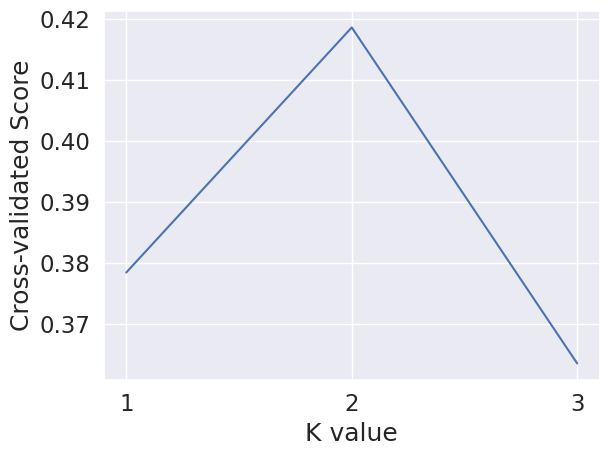

KNN best accuracy: 0.4186137853685218
Best K value: 2


In [45]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scoreListknn = []
for i in range(1, 4):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(KNclassifier, X_train, y_train, cv=5)
    scoreListknn.append(scores.mean())

plt.plot(range(1, 4), scoreListknn)
plt.xticks(np.arange(1, 4, 1))
plt.xlabel("K value")
plt.ylabel("Cross-validated Score")
plt.show()

max_score_index = np.argmax(scoreListknn)
KNAcc = scoreListknn[max_score_index]
print("KNN best accuracy:", KNAcc)
print("Best K value:", max_score_index + 1)

XG Boost Tuned

In [46]:
from sklearn.model_selection import GroupKFold

In [47]:
folds = 5
gkf = GroupKFold(n_splits = folds)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_over, X_over.flag , groups = X_over.id)):
    X_over.loc[valid_idx, 'folds'] = fold

In [48]:
X_over['folds'] = X_over['folds'].astype(int)

In [49]:
xgb_params = {
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'device': 'cuda',
        'eval_metric': 'logloss',
        'learning_rate': 0.1,
        'max_depth': 3,
        'n_estimators': 9999,
        'early_stopping_rounds': 150,
        'subsample': 0.8,
        'colsample_bytree': 0.4,
        'seed': 9
}

oof_xgb = pd.DataFrame(data=np.zeros((len(X_over),1)), columns=['oof_preds'])
oof_xgb['oof_preds'] = -10000

In [50]:
l1 = list(X_over.columns)
l1.remove('folds')
l1.remove('flag')

In [51]:
FEATURES = l1

In [52]:
FEATURES, len(FEATURES)

(['id',
  'rn',
  'pre_since_opened',
  'pre_since_confirmed',
  'pre_pterm',
  'pre_fterm',
  'pre_till_pclose',
  'pre_till_fclose',
  'pre_loans_credit_limit',
  'pre_loans_next_pay_summ',
  'pre_loans_outstanding',
  'pre_loans_total_overdue',
  'pre_loans_max_overdue_sum',
  'pre_loans_credit_cost_rate',
  'pre_loans5',
  'pre_loans530',
  'pre_loans3060',
  'pre_loans6090',
  'pre_loans90',
  'pre_util',
  'pre_over2limit',
  'pre_maxover2limit',
  'is_zero_util',
  'is_zero_over2limit',
  'is_zero_maxover2limit',
  'enc_paym_0',
  'enc_loans_account_holder_type',
  'enc_loans_credit_status',
  'enc_loans_credit_type',
  'enc_loans_account_cur',
  'pclose_flag',
  'fclose_flag'],
 32)

In [53]:
from collections import defaultdict
best_iteration_xgb = defaultdict(list)
importance_dict = {}
feature_importance_df = pd.DataFrame()
f1_scores = []
# rmses = []

# FEATURES = l1

for i in range(5):

  train_df = X_over[X_over['folds']!=i]
  valid_df = X_over[X_over['folds']==i]

  # train_df = train_df[l2]
  # valid_df = valid_df[l2]

  X_train = train_df.drop(['flag','folds'], axis=1)
  y_train = train_df['flag'].copy()

  X_valid = valid_df.drop(['flag','folds'], axis=1)
  y_valid = valid_df['flag'].copy()

  model =  XGBClassifier(random_state=9, **xgb_params)
  model.fit(X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          verbose=0)

  fold_preds = model.predict_proba(X_valid)[:, 1]
  # fold_f1 = f1_score(y_valid, fold_preds, average='macro')

  oof_xgb.loc[valid_df.index, 'oof_preds'] = fold_preds

  # print('F1:', fold_f1)
  # f1_scores.append(fold_f1)

  fold_importance_df = pd.DataFrame()
  fold_importance_df["feature"] = FEATURES
  fold_importance_df["importance"] = model.feature_importances_
  fold_importance_df["fold"] = i + 1
  feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

In [54]:
feature_importance_df

,feature,importance,fold
0,id,0.025054,1
1,rn,0.023711,1
2,pre_since_opened,0.043912,1
3,pre_since_confirmed,0.018873,1
4,pre_pterm,0.029917,1
...,...,...,...
27,enc_loans_credit_status,0.023007,5
28,enc_loans_credit_type,0.101095,5
29,enc_loans_account_cur,0.012504,5
30,pclose_flag,0.026828,5


In [55]:
feature_importance_df.groupby('feature')['importance'].mean().reset_index().sort_values(by='importance', ascending=False)

,feature,importance
3,enc_loans_credit_type,0.097315
4,enc_paym_0,0.089595
7,is_zero_maxover2limit,0.087153
17,pre_loans_credit_cost_rate,0.055635
30,pre_util,0.054879
27,pre_since_opened,0.041184
9,is_zero_util,0.038724
18,pre_loans_credit_limit,0.035064
19,pre_loans_max_overdue_sum,0.034570
23,pre_maxover2limit,0.032070


In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)  # Normalizing along the true class axis
        print()
    else:
        print()

    plt.figure(figsize=(6, 5))
    sns.set(font_scale=1.5)  # Adjust font scale for better visualization
    sns.heatmap(cm, cmap=cmap, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [58]:
oof_xgb.value_counts()

oof_preds
0.451755     4
0.495737     4
0.458442     4
0.580411     4
0.522582     4
            ..
0.433785     1
0.433784     1
0.433783     1
0.433783     1
0.433792     1
Name: count, Length: 377744, dtype: int64

In [59]:
BEST_THRESHOLD = 0.5
oof_xgb_thr = (oof_xgb > BEST_THRESHOLD).astype(int)

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62    194036
           1       0.62      0.55      0.58    194036

    accuracy                           0.60    388072
   macro avg       0.60      0.60      0.60    388072
weighted avg       0.60      0.60      0.60    388072

F1 Score: 0.6020977218582398




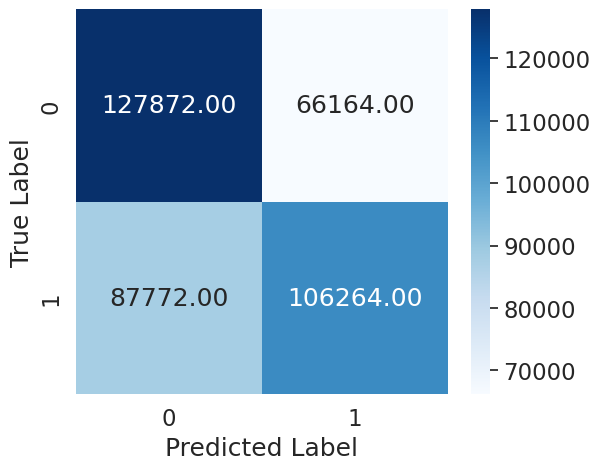

In [60]:
from sklearn.metrics import f1_score
sample_size = len(oof_xgb)

print("Classification Report:")
print(classification_report(X_over['flag'], oof_xgb_thr, ))
print("F1 Score:", f1_score(X_over['flag'], oof_xgb_thr, average='macro'))
print()
report = classification_report(oof_xgb_thr, X_over['flag'])
# print((y_pred == 0).sum(), f" Or {(y_pred == 0).sum()/sample_size} are eliminated with {report['0']['precision']*100:>1.0f} certainty, from out of 7500")
# print(1 - ((y_pred == 1).sum()/sample_size), " Is predicted as Interested")


plot_confusion_matrix(X_over['flag'], oof_xgb_thr, [0,1])